Program Name: Jet_Length_Width_Determiner_v1.py

Date: 6/11/2022

Creator: Sol Samuels

Description: 
 - This program intakes jet related FITS files from ones device, specifically those named in the format \*\*/Group\*0.00_1.00_0.00\*.fits\* , and returns the jet's estimated length and width.
 - The program also displays normalized cumulative histogram figures for jet intensits by row or column of fits image as pixel count increases from the edge of the jet.
 - NOTE: This is version 1 of this program. Program is subject to be changed.
 
Variable Keywords:
 - cul = "cumulative"
 - slice = refers to rows or columns of fits image pixels
 - vals = "values"
 - norm = "normalized"

In [1]:
import astropy.io
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

from astropy.io import fits

In [2]:
#This Function Takes FITS data and pixel size to display Jet Length Info
def jet_length(data, pixel_size):
    
    #Creates list of slice sums
    slice_vals = []
    for row in data:
        slice_sum = 0
        for element in row:
            slice_sum += element
        slice_vals.append(slice_sum)
        
    #Creates list of Cumulative Sum values
    cul_vals = []
    movingsum = 0
    for element in slice_vals:
        movingsum += element
        cul_vals.append(movingsum)
        
    #Normalizes the Cumulative Values and creates list
    max_val = cul_vals[-1]
    norm_cul_vals = []
    norm = 0
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
        
    #Edits the Normalizes Values to Exclude zeros and repeating terms
    norm_cul_vals_edit = []
    prev_ele = 0
    for element in norm_cul_vals:
        if element != 0 and element != prev_ele:
            norm_cul_vals_edit.append(element)
        prev_ele = element

    #Creates Value Headers for x-axis of histogram
    x_vals = []
    for x in range(len(norm_cul_vals_edit)):
        x_vals.append(x)
        
    #Creates normalized cumulative histogram of data
    plt.bar(x_vals, norm_cul_vals_edit)
    plt.title("Normalized Cumulative Histogram of Jet Intensities From Bottom to Top")
    plt.xlabel("Number of pixels from bottom edge of jet")
    plt.ylabel("Normalized Cumulative Value")
    plt.show()
    
    #Determines and prints length of jet in pixels. Estimates to 0.98
    pixel_count = 0
    for element in norm_cul_vals_edit:
        if element <= 0.98:
            pixel_count += 1
    print("\nLength of Jet in Pixels: {} pixels".format(pixel_count))

    #Converts pixel size to cm and prints
    jet_size_y = pixel_size * pixel_count
    print("Jet Length in cm (y-direction): {} cm".format(jet_size_y))


In [3]:
#This Function Takes FITS data, FITS image width and pixel size to display Jet Width Info
def jet_width(data, width, pixel_size):
    
    #Reorients data so rows become columns
    data_reorient = []
    for x in range(width):
        col_sub = []
        for row in data:
            col_sub.append(row[x])
        data_reorient.append(col_sub)
        
    #Creates list of slice sums
    slice_vals = []
    for row in data_reorient:
        slice_sum = 0
        for element in row:
            slice_sum += element
        slice_vals.append(slice_sum)
        
    #Creates list of Cumulative Sum values
    cul_vals = []
    movingsum = 0
    for element in slice_vals:
        movingsum += element
        cul_vals.append(movingsum)
        
    #Normalizes the Cumulative Values and creates list
    max_val = cul_vals[-1]
    norm_cul_vals = []
    norm = 0
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
        
    #Edits the Normalizes Values to Exclude zeros and repeating terms
    norm_cul_vals_edit = []
    prev_ele = 0
    for element in norm_cul_vals:
        if element != 0 and element != prev_ele:
            norm_cul_vals_edit.append(element)
        prev_ele = element

    #Creates Value Headers for x-axis of histogram
    x_vals = []
    for x in range(len(norm_cul_vals_edit)):
        x_vals.append(x)
        
    #Creates normalized cumulative histogram of data
    plt.bar(x_vals, norm_cul_vals_edit, color='red')
    plt.title("Normalized Cumulative Histogram of Jet Intensities From Left to Right")
    plt.xlabel("Number of pixels from left edge of jet")
    plt.ylabel("Normalized Cumulative Value")
    plt.show()
    
    #Determines and prints length of jet in pixels. Estimates to 0.98
    pixel_count = 0
    for element in norm_cul_vals_edit:
        if element <= 0.98:
            pixel_count += 1
    print("\nWidth of Jet in Pixels: {} pixels".format(pixel_count))

    #Converts pixel size to cm and prints
    jet_size_x = pixel_size * pixel_count
    print("Jet Width in cm (x-direction): {} cm".format(jet_size_x))



JET LENGTH AND WIDTH DETERMINING PROGRAM:
____________________________________________________________________________________________________

File Number 1

File Name: Group_L446_rc30_beta07_0010_nu=30.0_los=0.00_1.00_0.00_1.0Myr.fits
Simulation Title: Simulation Group_L446_rc30_beta07 - 1.0 Myr - 30 MHz
Time index: 1.0003e+00 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 48x48 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



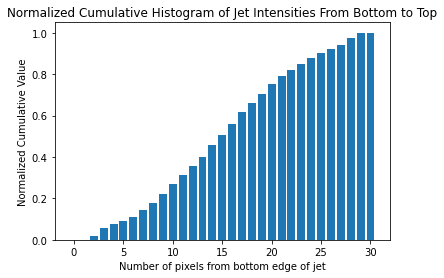


Length of Jet in Pixels: 29 pixels
Jet Length in cm (y-direction): 3.625e+22 cm

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



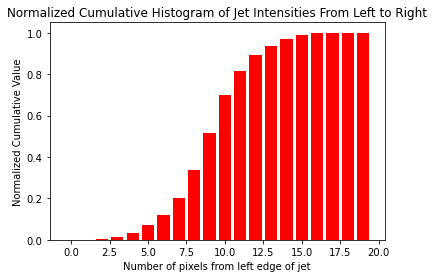


Width of Jet in Pixels: 15 pixels
Jet Width in cm (x-direction): 1.875e+22 cm
____________________________________________________________________________________________________

File Number 2

File Name: Group_L446_rc30_beta07_0040_nu=30.0_los=0.00_1.00_0.00_4.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 4.0 Myr - 30 MHz
Time index: 4.0003e+00 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 144x144 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



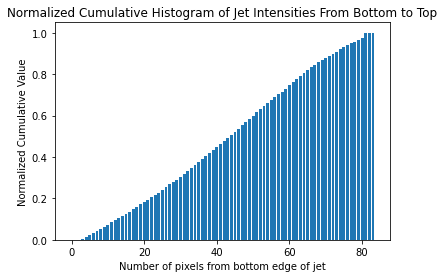


Length of Jet in Pixels: 81 pixels
Jet Length in cm (y-direction): 1.0125e+23 cm

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



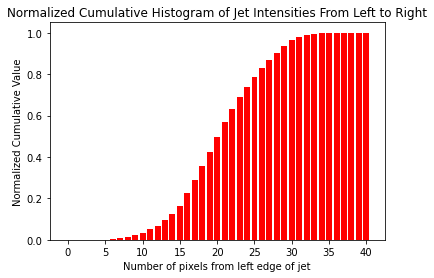


Width of Jet in Pixels: 31 pixels
Jet Width in cm (x-direction): 3.875e+22 cm
____________________________________________________________________________________________________

File Number 3

File Name: Group0.00_1.00_0.00.fits.txt
Error with file: Group0.00_1.00_0.00.fits.txt
Empty or corrupt FITS file


In [4]:
#Main Calling Block of Code

print("\nJET LENGTH AND WIDTH DETERMINING PROGRAM:")
print("{}\n".format("_"*100))

path = '**/Group*0.00_1.00_0.00*.fits*'

# Determines if there are any files in device
files_found = False
if len(glob.glob(path, recursive=True)) > 0:
    files_found = True

if files_found is True:
    file_count = 0
    for file in glob.glob(path, recursive=True):

        file_count += 1

        try:
            print("File Number {}\n".format(file_count))
            print("File Name: {}".format(file))
            fits_image_hdul = fits.open(file)

            #Displays FITS Image title, time index, and pixel size
            sim_title = fits_image_hdul[0].header['OBJECT']
            sim_time = fits_image_hdul[0].header['TIME']
            pixel = fits_image_hdul[0].header['CDELT1']
            print("Simulation Title: {}".format(sim_title))
            print("Time index: {}".format(sim_time))
            print("Pixel size: {}".format(pixel))
            pixel_size = float(pixel[:-3])

            #Difines Data From FITS image and records image dimensions
            data =  fits_image_hdul[0].data
            length = len(data[0])
            width = len(data)
            print("FITS Image Dimensions: {}x{} pixels \n".format(length, width))

            #Calls jet_length function
            print("\nJET LENGTH DATA:")
            print("{}\n".format("~"*50))
            jet_length(data, pixel_size)

            #Calls jet_width function
            print("\nJET WIDTH DATA:")
            print("{}\n".format("~"*50))
            jet_width(data, width, pixel_size)

            print("{}\n".format("_"*100))

        except OSError:
            print("Error with file: {}".format(file))
            print("Empty or corrupt FITS file")
            
else:
    print("ERROR: Could not find any necessary files on your device")
    print("Program intakes files of the name: {}".format(path))